# Nomor 1 

## Ide

1. Bentuk data artifisial dengan y = a * X + b + GaussianNoise (np.random.rand(1))
2. Bentuk scatter plot dari data artifisial
3. Hitung nilai eksak coef dan intercept dari regeresi linearnya sesuai formula pada soal
4. Membuat model regresi linear
5. Bandingkan coef dan intercept dari model regresi linear dengan coef eksak dan intercept eksak
6. Visualisasikan hasil model regresi linear dengan data aslinya
7. Hitung RMSE untuk mengetahui errornya

## Membuat data artificial

In [1]:
import numpy as np #untuk aljabar, random nilai, array

a , b = 2, 7
X1 = np.random.rand(20)
y1 = a*X1 + b + np.random.rand(1)

In [2]:
print(X1)

[0.91766298 0.83745342 0.92154286 0.02356097 0.66588888 0.89314928
 0.17492985 0.65994215 0.39142487 0.02241051 0.46506293 0.1666635
 0.37214543 0.00520073 0.3188103  0.16002174 0.25259627 0.8937825
 0.94984301 0.2465197 ]


In [3]:
print(y1)

[9.65653493 9.49611582 9.6642947  7.86833091 9.15298674 9.60750754
 8.17106867 9.14109326 8.60405871 7.86603    8.75133483 8.15453598
 8.56549983 7.83161044 8.45882958 8.14125245 8.32640151 9.60877398
 9.720895   8.31424838]


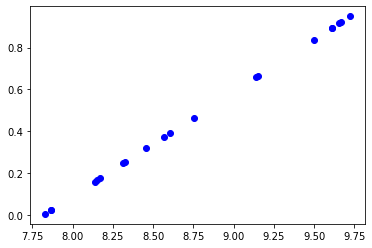

In [4]:
#Membuat scatter plotnya

import matplotlib.pyplot as plt #untuk plotting

plt.scatter(y1, X1, color = 'b')
plt.show()

#### Nilai koefisien dan intercept fungsi regresi
Intercept = $\frac{\sum y \sum x^2 - \sum x \sum xy}{n \sum x^2 - (\sum x)^2}$

coef = $\frac{n \sum xy - \sum x \sum y}{n \sum x^2 - (\sum x)^2}$

In [5]:
#hitung sumasi yang dibutuhkan

sum_x = sum(X1)
print(sum_x)

sum_y = sum(y1)
print(sum_y)

sum_x2 = sum(X1**2)
print(sum_x2)

sum_xy = sum(X1*y1)
print(sum_xy)

9.338611902552818
175.1014032484458
6.589645584129148
86.21852636808998


In [6]:
#menghitung nilai intercept dan coef (sesuai formula di soal)

intercept_eksak = ((sum_y*sum_x2) - (sum_x*sum_xy))/(20*sum_x2 - (sum_x)**2)
coef_eksak = ((20*sum_xy) - (sum_x*sum_y))/(20*sum_x2 - (sum_x)**2)

print(coef_eksak)
print(intercept_eksak)

1.9999999999999925
7.821208972167017


## Membuat model Regresi Linear

In [7]:
#import package yang akan digunakan

 #untuk plotting
import pandas as pd #untuk mengolah data
import math as mth
%matplotlib inline

In [8]:
#membuat data train dan test dengan perbandingan 8:2

msk = np.random.rand(len(y1)) < 0.8
train_x = X1[msk].reshape(-1,1)
test_x =X1[~msk].reshape(-1,1)
train_y = y1[msk].reshape(-1,1)
test_y = y1[~msk].reshape(-1,1)

In [9]:
#membuat model regresi linearnya

from sklearn import linear_model

regr = linear_model.LinearRegression() #definisikan model regresi linier dengan nama 'regr'
regr.fit(train_x, train_y) #fit data training ke model regr

#output koefisien dan intersepnya
print('Coefficients: ', regr.coef_)
print('y-Intercept: ', regr.intercept_)

Coefficients:  [[2.]]
y-Intercept:  [7.82120897]


## Membandingkan nilai Coef dan Intercept

In [10]:
print([regr.coef_, regr.intercept_])
print([coef_eksak, intercept_eksak])

#terlihat coef dan intercept yang dihasilkan dari model linear regression
#sangat mendekati nilai eksaknya

[array([[2.]]), array([7.82120897])]
[1.9999999999999925, 7.821208972167017]


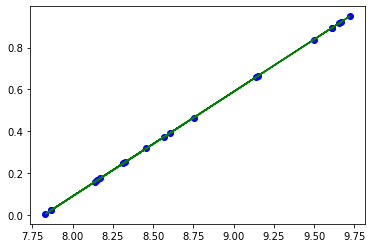

In [11]:
#Membuat plot model regresi dan scatter plot data yang sebenarnya

plt.plot(regr.coef_*train_x + regr.intercept_, train_x, 'g')
plt.scatter(y1, X1, color = 'b')
plt.show()

## Menghitung nilai RMSE

In [12]:
test_y_ = regr.predict(test_x)

MSE = np.mean(np.absolute(test_y_ - test_y))
RMSE = mth.sqrt(MSE)
print("Root Mean Squared Error (RMSE) : %.12f" %RMSE)

Root Mean Squared Error (RMSE) : 0.000000000000


# Nomor 2

## Ide

1. Import data yg akan dipakai dalam format .csv
2. Lakukan pre-processing data (memilih fitur yang akan dipakai, melihat detail data, mengonversi data kategorik menjadi numerik)
3. Bentuk train dan test set dengan perbandingan 7:3
4. Membuat model Multi Logistic Regresion
5. Memprediksi data X_test dan data yang diminta pada soal dengan model yang sudah dibuat
6. Menghitung nilai akurasi modelnya
7. Plotting scatter plot dan decision boundariesnya

In [13]:
#import package yang akan digunakan
import numpy as np #untuk operasi2 array dan aljabar
import pandas as pd #untuk data processing
from sklearn import preprocessing #untuk preprocessing data
%matplotlib inline 
import matplotlib.pyplot as plt #untuk plotting (visualisasi)

In [14]:
#import data csv

iris_df = pd.read_csv(r"C:\Users\herar\Downloads\Iris.csv")
iris_df #melihat data yg sudah diimport

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


## Pre-Processing Data

In [15]:
#cek fitur2 yang ada

print(iris_df.columns)

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [16]:
#ambil fitur PetalLenghtCm dan PetalWidthCm saja (sesuai soal)

iris_df = iris_df[['PetalLengthCm', 'PetalWidthCm',
       'Species']]
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PetalLengthCm  150 non-null    float64
 1   PetalWidthCm   150 non-null    float64
 2   Species        150 non-null    object 
dtypes: float64(2), object(1)
memory usage: 3.6+ KB


In [17]:
iris_df['Species'].unique() #mengecek jenis species

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [18]:
iris_df['Species'].value_counts() #mengecek jumlah tiap jenis species

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [19]:
#melihat keterangan data

print("Iris-setosa")
setosa = iris_df["Species"] == 'Iris-setosa'
print(iris_df[setosa].describe())

print("\n Iris-versicolor")
versicolor = iris_df["Species"] == 'Iris-versicolor'
print(iris_df[versicolor].describe())

print("\n Iris-setosa")
virginica = iris_df["Species"] == 'Iris-virginica'
print(iris_df[virginica].describe())

Iris-setosa
       PetalLengthCm  PetalWidthCm
count      50.000000      50.00000
mean        1.464000       0.24400
std         0.173511       0.10721
min         1.000000       0.10000
25%         1.400000       0.20000
50%         1.500000       0.20000
75%         1.575000       0.30000
max         1.900000       0.60000

 Iris-versicolor
       PetalLengthCm  PetalWidthCm
count      50.000000     50.000000
mean        4.260000      1.326000
std         0.469911      0.197753
min         3.000000      1.000000
25%         4.000000      1.200000
50%         4.350000      1.300000
75%         4.600000      1.500000
max         5.100000      1.800000

 Iris-setosa
       PetalLengthCm  PetalWidthCm
count      50.000000      50.00000
mean        5.552000       2.02600
std         0.551895       0.27465
min         4.500000       1.40000
25%         5.100000       1.80000
50%         5.550000       2.00000
75%         5.875000       2.30000
max         6.900000       2.50000


## Train dan Test Set

In [20]:
#membagi data ke 2 array. X sbg data yg diketahui dan Y sbg data target

X = iris_df[['PetalLengthCm', 'PetalWidthCm']].values
Y = iris_df['Species']

In [21]:
#mengubah data kategori pada spesies menjadi numerik

from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
Y_new = ordinal_encoder.fit_transform(np.array([Y]).reshape(-1,1))
Y_new = Y_new.ravel()

#0 = Iris-setosa, 1 = Iris-versicolor, 2 = Iris-virginica

In [22]:
#membagi data train dan test dengan perbandingan 7 : 3

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 4)
print('Train set: ', X_train.shape, Y_train.shape)
print('Test set: ', X_test.shape, Y_test.shape)

Train set:  (105, 2) (105,)
Test set:  (45, 2) (45,)


## Membuat Model Multi Logistic Regression

In [23]:
#membuat model regresi logistik

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

LR = LogisticRegression(multi_class = 'multinomial', solver = 'newton-cg')
LR.fit(X_train, Y_train)

LogisticRegression(multi_class='multinomial', solver='newton-cg')

## Memprediksi data

In [24]:
#Prediksi dengan data X_test

Ytest = LR.predict(X_test)
Ytest

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica'], dtype=object)

In [25]:
#Prediksi sesuai soal

soal1 = [[4, 2]]
Ysoal1 = LR.predict(soal1)
print("1. Petal lenght, Petal width = {} adalah bunga {} " .format(soal1, Ysoal1))

soal2 = [[2.4, 3]]
Ysoal2 = LR.predict(soal2)
print("\n2. Petal lenght, Petal width = {} adalah bunga {} " .format(soal2, Ysoal2))

soal3 = [[5.6, 3.3]]
Ysoal3 = LR.predict(soal3)
print("\n3. Petal lenght, Petal width = {} adalah bunga {} " .format(soal3, Ysoal3))

1. Petal lenght, Petal width = [[4, 2]] adalah bunga ['Iris-versicolor'] 

2. Petal lenght, Petal width = [[2.4, 3]] adalah bunga ['Iris-setosa'] 

3. Petal lenght, Petal width = [[5.6, 3.3]] adalah bunga ['Iris-virginica'] 


In [26]:
#Menghitung nilai akurasinya

from sklearn.metrics import accuracy_score

print("Nilai akurasi dari model Multi Logistic Regression : ", accuracy_score(Y_test, Ytest))

Nilai akurasi dari model Multi Logistic Regression :  0.9777777777777777


## Membuat Plot

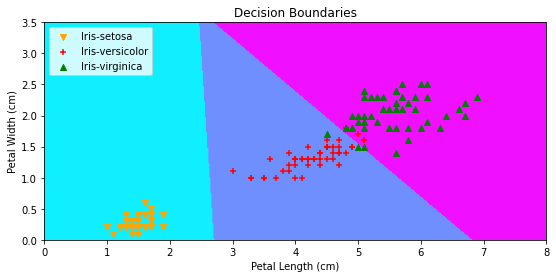

In [27]:
import matplotlib.pyplot as plt

x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_predict = LR.predict(X_new)

ordinal_encoder = OrdinalEncoder()
Y_plot = ordinal_encoder.fit_transform(np.array([y_predict]).reshape(-1,1))
Y_plot = Y_plot.ravel()

zz = Y_plot.reshape(x0.shape)

plt.figure(figsize = (9, 4))

plt.contourf(x0, x1, zz, cmap = plt.cm.cool)

plt.scatter(x = 'PetalLengthCm', y = 'PetalWidthCm', data = iris_df[Y_new == 0.], marker = 'v', label = 'Iris-setosa', c = 'orange')
plt.scatter(x = 'PetalLengthCm', y = 'PetalWidthCm', data = iris_df[Y_new == 1.], marker = '+', label = 'Iris-versicolor', c = 'red')
plt.scatter(x = 'PetalLengthCm', y = 'PetalWidthCm', data = iris_df[Y_new == 2.], marker = '^', label = 'Iris-virginica', c = 'green')

plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.title('Decision Boundaries')
plt.legend(loc = "upper left")
plt.show()

# Nomor 3 

## Ide

1. Import data yang akan digunakan dalam format .csv
2. Lakukan pre-processing data (memilih fitur yang akan dipakai, melihat detail data, mengonversi data, normalisasi data jika diperlukan oleh model)
3. Bentuk train dan test set dengan perbandingan 8:2
4. Membuat model, pada soal ini akan kita buat 3 model, yaitu Logistic regression, Decision Tree, dan SVM
5. Memprediksi data X_test dengan model yang telah dibentuk
6. Mengevaluasi model (membentuk confusion matrix, mengecek nilai akurasi)
7. Membuat visualisasi (pada model decision tree)
8. Membuat file .pkl untuk menyimpan model yang sudah dibuat

Notes : step 2-8 dilakukan pada setiap model yang akan dibentuk

In [28]:
#import package yang akan digunakan

import numpy as np #untuk aljabar
import pandas as pd #untuk mengolah data
from sklearn import preprocessing #untuk preprocessing dan modeling
%matplotlib inline
import matplotlib.pyplot as plt #untuk visualiasi plotting

In [29]:
#import data csv

heart_df = pd.read_csv(r"C:\Users\herar\Downloads\heart.csv")
heart_df #melihat data yg sudah diimport

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Pre-processing data

In [30]:
#cek fitur2 yang ada

print(heart_df.columns)

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')


In [31]:
#pilih fitur yang diduga berpengaruh thdp prediksi heart attack pasien

heart_df = heart_df[['age', 'trtbps', 'chol', 'thalachh', 'oldpeak', 'output']]
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   trtbps    303 non-null    int64  
 2   chol      303 non-null    int64  
 3   thalachh  303 non-null    int64  
 4   oldpeak   303 non-null    float64
 5   output    303 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 14.3 KB


## Membagi train set dan test test

In [32]:
X3 = heart_df[['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']].values
Y3 = heart_df['output']

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X3, Y3, test_size = 0.2, random_state = 4)
print('Train Set : ', X_train.shape, Y_train.shape)
print('Test Set : ', X_test.shape, Y_test.shape)

Train Set :  (242, 5) (242,)
Test Set :  (61, 5) (61,)


## Model Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

heartLR = LogisticRegression(C = 0.01, solver='liblinear').fit(X_train, Y_train)
heartLR

LogisticRegression(C=0.01, solver='liblinear')

In [35]:
#prediksi nilai Y dengan data X_test

Yhat = heartLR.predict(X_test)
Yhat

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [36]:
#memprediksi probabilitas dari entri df (per baris)

Yhat_prob = heartLR.predict_proba(X_test)
Yhat_prob #kiri terhadap kelas 0; kanan terhadap kelas 1

array([[0.19065561, 0.80934439],
       [0.63031   , 0.36969   ],
       [0.37530723, 0.62469277],
       [0.16395905, 0.83604095],
       [0.47111993, 0.52888007],
       [0.39918013, 0.60081987],
       [0.45674845, 0.54325155],
       [0.11321111, 0.88678889],
       [0.44640025, 0.55359975],
       [0.24813106, 0.75186894],
       [0.33368502, 0.66631498],
       [0.13591939, 0.86408061],
       [0.52362614, 0.47637386],
       [0.29809065, 0.70190935],
       [0.45632606, 0.54367394],
       [0.84491909, 0.15508091],
       [0.35808163, 0.64191837],
       [0.25429158, 0.74570842],
       [0.38711512, 0.61288488],
       [0.34708968, 0.65291032],
       [0.14610299, 0.85389701],
       [0.31061156, 0.68938844],
       [0.75829119, 0.24170881],
       [0.5842119 , 0.4157881 ],
       [0.38672616, 0.61327384],
       [0.61443024, 0.38556976],
       [0.63665491, 0.36334509],
       [0.4848567 , 0.5151433 ],
       [0.26967359, 0.73032641],
       [0.40758391, 0.59241609],
       [0.

### Evaluasi model

In [37]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

#membuat visualisasi dengan confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matriks heart_LR',cmap=plt.cm.Set2):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),horizontalalignment="center",color="red" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[31  5]
 [10 15]]


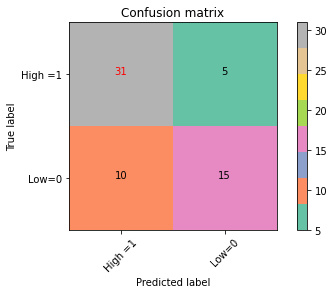

In [38]:
#memanggil fungsi confusion matrix
cnf = confusion_matrix(Y_test, Yhat, labels=[1,0])
plt.figure()
plot_confusion_matrix(cnf,classes=['High =1', 'Low=0'],normalize = False, title='Confusion matrix')

In [39]:
import pickle
pickle.dump(heartLR, open('heartLR.pkl', 'wb'))

## Decision Tree

In [40]:
#normalisasi data
X3_1 = preprocessing.StandardScaler().fit(X3).transform(X3)
X3_1

array([[ 0.9521966 ,  0.76395577, -0.25633371,  0.01544279,  1.08733806],
       [-1.91531289, -0.09273778,  0.07219949,  1.63347147,  2.12257273],
       [-1.47415758, -0.09273778, -0.81677269,  0.97751389,  0.31091206],
       ...,
       [ 1.50364073,  0.70684287, -1.029353  , -0.37813176,  2.03630317],
       [ 0.29046364, -0.09273778, -2.2275329 , -1.51512489,  0.13837295],
       [ 0.29046364, -0.09273778, -0.19835726,  1.0649749 , -0.89686172]])

In [41]:
#mengubah data numerik pada kolom output menjadi data kategorik
Y3_1 = pd.cut(heart_df['output'], bins = [-1,0,1], labels=['Low','High'])
Y3_1

0      High
1      High
2      High
3      High
4      High
       ... 
298     Low
299     Low
300     Low
301     Low
302     Low
Name: output, Length: 303, dtype: category
Categories (2, object): ['Low' < 'High']

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X3_1, Y3_1, test_size = 0.2, random_state = 1)
print('Train Set : ', X_train.shape, Y_train.shape)
print('Test Set : ', X_test.shape, Y_test.shape)

Train Set :  (242, 5) (242,)
Test Set :  (61, 5) (61,)


### Membuat model Decision Tree

In [43]:
from sklearn.tree import DecisionTreeClassifier
heartTree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
print(heartTree.fit(X_train, Y_train))
predTree = heartTree.predict(X_test)

DecisionTreeClassifier(criterion='entropy', max_depth=3)


### Memprediksi data

In [44]:
#membandingkan output dari X_test dengan hasil prediksi model
comparison = {"Y_test" : Y_test, "Predicted": predTree}
comp = pd.DataFrame(comparison)
comp

,Y_test,Predicted
204,Low,Low
159,High,High
219,Low,High
174,Low,Low
184,Low,Low
...,...,...
0,High,Low
288,Low,Low
259,Low,High
179,Low,High


### Mengecek nilai akurasi

In [45]:
from sklearn.metrics import accuracy_score
print("Nilai akurasi model Decision Tree : ", accuracy_score(Y_test, predTree))

Nilai akurasi model Decision Tree :  0.7377049180327869


### Visualisasi Decision Tree

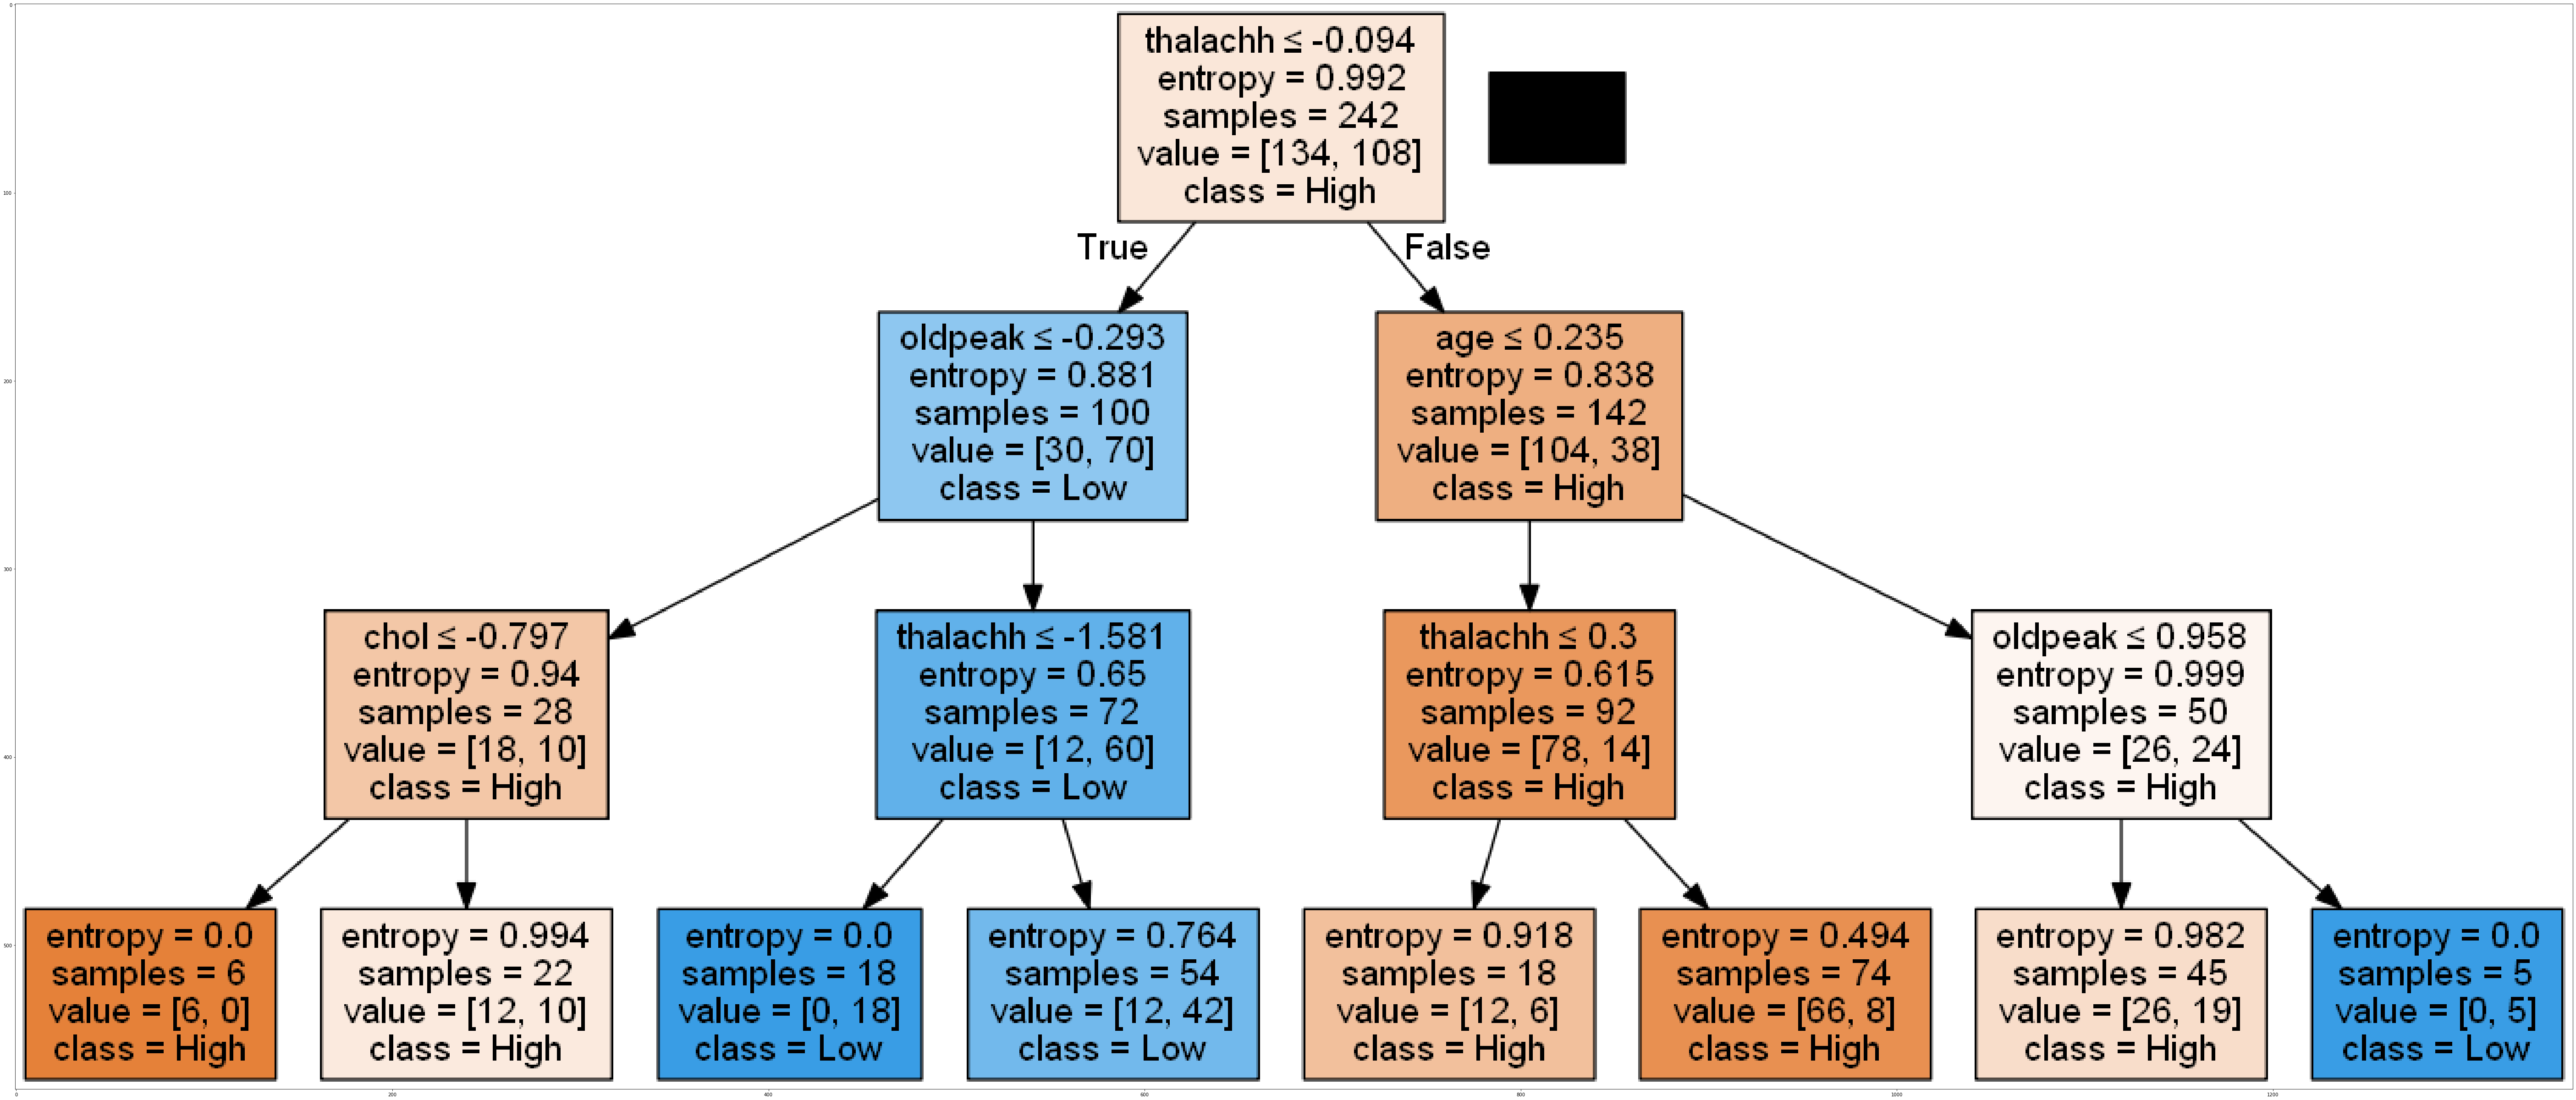

In [46]:
from io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline
import matplotlib.pyplot as plt

dot_data = StringIO()
filename = "hearttree.png"
featureNames = heart_df.columns[0:5]
out = tree.export_graphviz(heartTree, feature_names=featureNames, out_file=dot_data, class_names=np.unique(Y_train),filled=True, special_characters = True, rotate = False) #graphviz untuk membuat graph di phython
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100,200)) #ukuran 100 x 200
plt.imshow(img, interpolation='nearest')

In [47]:
pickle.dump(heartTree, open('heartTree.pkl', 'wb'))

## SVM

In [48]:
#mengubah tipe data oldpeak dari float menjadi integer
heart_df = heart_df[pd.to_numeric(heart_df['oldpeak'],errors="coerce").notnull()]
heart_df['oldpeak'] = heart_df['oldpeak'].astype('int')
heart_df.dtypes

age         int64
trtbps      int64
chol        int64
thalachh    int64
oldpeak     int32
output      int64
dtype: object

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X3, Y3, test_size = 0.2, random_state = 4)
print('Train Set : ', X_train.shape, Y_train.shape)
print('Test Set : ', X_test.shape, Y_test.shape)

Train Set :  (242, 5) (242,)
Test Set :  (61, 5) (61,)


### Membuat Model

In [50]:
from sklearn import svm
heartSVM = svm.SVC(kernel='rbf')
heartSVM.fit(X_train, Y_train)

SVC()

In [51]:
#Prediksi
Yhat3 = heartSVM.predict(X_test)
Yhat3

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0], dtype=int64)

In [52]:
#Evaluasi Jaccard score
from sklearn.metrics import jaccard_score
print(jaccard_score(Y_test, Yhat3, pos_label=0))
print(jaccard_score(Y_test, Yhat3, pos_label=1))

0.40625
0.6041666666666666


In [53]:
#Evaluasi f1-score
from sklearn.metrics import f1_score
print(f1_score(Y_test, Yahat3, pos_label=0))
print(f1_score(Y_test, Yhat3, pos_label=1))

0.5777777777777778
0.7532467532467532


In [54]:
#visualisasi confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Pastel2):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="red" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[15 10]
 [ 5 31]]


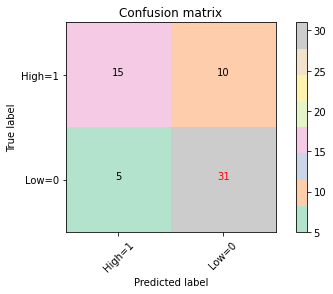

In [55]:
#confusion matrix
cnf_matrix =confusion_matrix(Y_test, Yhat, labels=[0,1])
plt.figure()
plot_confusion_matrix(cnf_matrix,classes=['High=1', 'Low=0'],normalize = False, title='Confusion matrix')

In [56]:
pickle.dump(heartSVM, open('heartSVM.pkl', 'wb'))

## Nomor 4

## Ide

Ide program nomor 4 sama dengan nomor 3, yaitu :

1. Import data yang akan digunakan dalam format .csv
2. Lakukan pre-processing data (memilih fitur yang akan dipakai, melihat detail data, mengonversi data, normalisasi data jika diperlukan oleh model)
3. Bentuk train dan test set dengan perbandingan 8:2
4. Membuat model, pada soal ini akan kita buat 3 model, yaitu Logistic regression, Decision Tree, dan SVM
5. Memprediksi data X_test dengan model yang telah dibentuk
6. Mengevaluasi model (membentuk confusion matrix, mengecek nilai akurasi)
7. Membuat visualisasi (pada model decision tree)
8. Membuat file .pkl untuk menyimpan model yang sudah dibuat

Notes : step 2-8 dilakukan pada setiap model yang akan dibentuk

In [57]:
#import package yang akan digunakan

import numpy as np #untuk aljabar
import pandas as pd #untuk mengolah data
from sklearn import preprocessing #untuk preprocessing dan modeling
%matplotlib inline
import matplotlib.pyplot as plt #untuk visualiasi plotting

In [58]:
#import data csv

cc_df = pd.read_csv(r"C:\Users\herar\Downloads\CreditCard.csv")
cc_df #melihat data yg sudah diimport

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
0,5008804,1,1,1,1,0,0,0,0,2,15,427500.0,32.868574,12.435574,Working,Higher education,Civil marriage,Rented apartment,Other,1
1,5008806,1,1,1,0,0,0,0,0,2,29,112500.0,58.793815,3.104787,Working,Secondary / secondary special,Married,House / apartment,Security staff,0
2,5008808,0,0,1,0,1,1,0,0,1,4,270000.0,52.321403,8.353354,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0
3,5008812,0,0,1,0,0,0,1,0,1,20,283500.0,61.504343,0.000000,Pensioner,Higher education,Separated,House / apartment,Other,0
4,5008815,1,1,1,1,1,1,0,0,2,5,270000.0,46.193967,2.105450,Working,Higher education,Married,House / apartment,Accountants,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,5148694,0,0,0,0,0,0,0,0,2,20,180000.0,56.400884,0.542106,Pensioner,Secondary / secondary special,Civil marriage,Municipal apartment,Laborers,1
9705,5149055,0,0,1,1,1,0,0,0,2,19,112500.0,43.360233,7.375921,Commercial associate,Secondary / secondary special,Married,House / apartment,Other,1
9706,5149729,1,1,1,0,0,0,0,0,2,21,90000.0,52.296762,4.711938,Working,Secondary / secondary special,Married,House / apartment,Other,1
9707,5149838,0,0,1,0,1,1,0,0,2,32,157500.0,33.914454,3.627727,Pensioner,Higher education,Married,House / apartment,Medicine staff,1


## Pre-processing data

In [59]:
#cek fitur2 yang ada

print(cc_df.columns)

Index(['ID', 'Gender', 'Own_car', 'Own_property', 'Work_phone', 'Phone',
       'Email', 'Unemployed', 'Num_children', 'Num_family', 'Account_length',
       'Total_income', 'Age', 'Years_employed', 'Income_type',
       'Education_type', 'Family_status', 'Housing_type', 'Occupation_type',
       'Target'],
      dtype='object')


In [60]:
#pilih fitur yang diduga berpengaruh thdp prediksi resiko gagal bayar

cdf = cc_df[['Own_property', 'Unemployed', 'Total_income', 'Housing_type', 'Occupation_type', 'Target']]
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Own_property     9709 non-null   int64  
 1   Unemployed       9709 non-null   int64  
 2   Total_income     9709 non-null   float64
 3   Housing_type     9709 non-null   object 
 4   Occupation_type  9709 non-null   object 
 5   Target           9709 non-null   int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 455.2+ KB


In [61]:
#mengecek variasi data pada fitur2 yang dipilih
Housingtype = pd.unique(cdf['Housing_type'])
print('Housingtype',  Housingtype)

Occupationtype = pd.unique(cdf['Occupation_type'])
print('\nOccupationtype', Occupationtype)

Housingtype ['Rented apartment' 'House / apartment' 'Municipal apartment'
 'With parents' 'Co-op apartment' 'Office apartment']

Occupationtype ['Other' 'Security staff' 'Sales staff' 'Accountants' 'Laborers'
 'Managers' 'Drivers' 'Core staff' 'High skill tech staff'
 'Cleaning staff' 'Private service staff' 'Cooking staff'
 'Low-skill Laborers' 'Medicine staff' 'Secretaries'
 'Waiters/barmen staff' 'HR staff' 'Realty agents' 'IT staff']


In [62]:
#melihat value per baris
X = cdf[['Own_property', 'Unemployed', 'Total_income', 'Housing_type', 'Occupation_type', 'Target']].values
X

array([[1, 0, 427500.0, 'Rented apartment', 'Other', 1],
       [1, 0, 112500.0, 'House / apartment', 'Security staff', 0],
       [1, 0, 270000.0, 'House / apartment', 'Sales staff', 0],
       ...,
       [1, 0, 90000.0, 'House / apartment', 'Other', 1],
       [1, 0, 157500.0, 'House / apartment', 'Medicine staff', 1],
       [1, 0, 112500.0, 'Rented apartment', 'Laborers', 1]], dtype=object)

## Train-test data set

In [63]:
#mengubah data kategorik menjadi numerik
from sklearn import preprocessing
le_Housing_type = preprocessing.LabelEncoder()
le_Housing_type.fit(['Rented apartment','House / apartment','Municipal apartment','With parents','Co-op apartment','Office apartment'])
X[:, 3] = le_Housing_type.transform(X[:, 3])
le_Occupation_type = preprocessing.LabelEncoder()
le_Occupation_type.fit(['Other','Security staff','Sales staff','Accountants','Laborers','Managers','Drivers','Core staff','High skill tech staff','Cleaning staff','Private service staff','Cooking staff','Low-skill Laborers','Medicine staff','Secretaries','Waiters/barmen staff','HR staff','Realty agents','IT staff'])
X[:, 4] = le_Occupation_type.transform(X[:, 4])
X

array([[1, 0, 427500.0, 4, 12, 1],
       [1, 0, 112500.0, 1, 17, 0],
       [1, 0, 270000.0, 1, 15, 0],
       ...,
       [1, 0, 90000.0, 1, 12, 1],
       [1, 0, 157500.0, 1, 11, 1],
       [1, 0, 112500.0, 4, 8, 1]], dtype=object)

In [64]:
#normalisasi data
X = preprocessing.StandardScaler().fit(X).transform(X)
X

array([[ 0.6993643 , -0.46006093,  2.48077331,  2.93132594,  0.64997162,
         2.56269782],
       [ 0.6993643 , -0.46006093, -0.69232071, -0.29521516,  1.81946281,
        -0.39021378],
       [ 0.6993643 , -0.46006093,  0.8942263 , -0.29521516,  1.35166633,
        -0.39021378],
       ...,
       [ 0.6993643 , -0.46006093, -0.91897028, -0.29521516,  0.64997162,
         2.56269782],
       [ 0.6993643 , -0.46006093, -0.23902156, -0.29521516,  0.41607338,
         2.56269782],
       [ 0.6993643 , -0.46006093, -0.69232071,  2.93132594, -0.28562133,
         2.56269782]])

In [65]:
import numpy as np
Y = cdf['Target']
Y

0       1
1       0
2       0
3       0
4       0
       ..
9704    1
9705    1
9706    1
9707    1
9708    1
Name: Target, Length: 9709, dtype: int64

## Logictic Regression

In [66]:
#memisahkan data train dan data set dengan perbandingan 8:2
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=4)
print('Train Set : ', X_train.shape, Y_train.shape)
print('Test Set : ', X_test.shape, Y_test.shape)

Train Set :  (7767, 6) (7767,)
Test Set :  (1942, 6) (1942,)


In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

LR = LogisticRegression(C = 0.01, solver='liblinear').fit(X_train, Y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [68]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

Confusion matrix, without normalization
[[ 254    0]
 [   0 1688]]


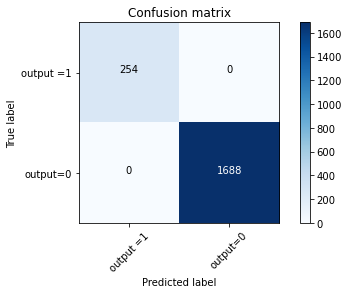

In [69]:
#Evaluasi Model
from sklearn.metrics import classification_report, confusion_matrix
import itertools
# code untuk membuat visualiasi confusion matrix
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
#Confusion matrix
cnf = confusion_matrix(Y_test, yhat, labels=[1,0])
plt.figure()
plot_confusion_matrix(cnf,classes=['output =1', 'output=0'],normalize = False, title='Confusion matrix')

In [70]:
print (classification_report(Y_test, yhat))
# Precission = TP/(TP+FP)
# recall = TP/(TP+FN)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1688
           1       1.00      1.00      1.00       254

    accuracy                           1.00      1942
   macro avg       1.00      1.00      1.00      1942
weighted avg       1.00      1.00      1.00      1942



In [71]:
pickle.dump(LR, open('creditcardLR.pkl', 'wb'))

## Decision Tree

## SVM

# Nomor 5

## Ide

1. Import data yang akan digunakan dalam format .csv
2. Lakukan pre-processing data (memilih 5 fitur yang akan dipakai, melihat detail data, mengonversi data, normalisasi data jika diperlukan oleh model)
3. Bentuk train dan test set dengan perbandingan 8:2 (sesuai soal)
4. Membuat model Linear regression, dengan 2 model pembanding yang lain
5. Memprediksi data X_test dengan model yang telah dibentuk
6. Mengevaluasi model (melihat nilai error tiap modelnya)
7. Membandingkan 3 model yang telah dibuat dan menarik kesimpulan modek terbaik
8. Membuat file .pkl untuk menyimpan model yang sudah dibuat

In [72]:
#import package yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [73]:
#import data csv

car_df = pd.read_csv(r"C:\Users\herar\Downloads\CarPrice.csv")
car_df #melihat data yg sudah diimport

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [74]:
# pilih fitur enginesize, stroke, horsepower, citympg, highwaympg, dan price
car2_df = car_df[['wheelbase','enginesize','boreratio','stroke','horsepower','peakrpm','citympg','price']]#variabel cdf berisi fitur yang dipilih
car2_df

,wheelbase,enginesize,boreratio,stroke,horsepower,peakrpm,citympg,price
0,88.6,130,3.47,2.68,111,5000,21,13495.0
1,88.6,130,3.47,2.68,111,5000,21,16500.0
2,94.5,152,2.68,3.47,154,5000,19,16500.0
3,99.8,109,3.19,3.40,102,5500,24,13950.0
4,99.4,136,3.19,3.40,115,5500,18,17450.0
...,...,...,...,...,...,...,...,...
200,109.1,141,3.78,3.15,114,5400,23,16845.0
201,109.1,141,3.78,3.15,160,5300,19,19045.0
202,109.1,173,3.58,2.87,134,5500,18,21485.0
203,109.1,145,3.01,3.40,106,4800,26,22470.0


In [75]:
#membagi data train dan test set
msk = np.random.rand(len(car_df)) < 0.8 # membagi data menjadi 8:2 dengan membuat variabel baru msk
train = car2_df[msk] 
test = car2_df[~msk] 

In [76]:
#membuat model Linear Regression
from sklearn import linear_model
carLR = linear_model.LinearRegression()

## Membuat model utama

In [77]:
#mendefinisikan fitur yang akan di fit ke dalam model
X5 = np.array(train[['wheelbase','enginesize','stroke','horsepower','peakrpm']]) 
Y5 = np.array(train['price'])
#fit data training ke model lm
carLR.fit(X5, Y5)

LinearRegression()

In [78]:
#output untuk nilai coefficients dan intercept
print('Coefficients: ', carLR.coef_)
print('y-Intercept: ', carLR.intercept_)

Coefficients:  [ 2.27601292e+02  1.23889054e+02 -2.66011600e+03  4.35319964e+01
  1.43167499e+00]
y-Intercept:  -28146.762880861672


## Model Pembanding 1

In [79]:
#mendefinisikan fitur lain yang akan di prediksi ke dalam model pembanding 1 
X5 = np.array(test[['wheelbase','enginesize','stroke','horsepower','peakrpm']]) #data test untuk fitur
Y5 = np.array(test['price']) #data test untuk price
Y5_hat = carLR.predict(test[['wheelbase','enginesize','stroke','horsepower','peakrpm']])

C:\Users\herar\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [80]:
print("Residual Sum of Squares: %.2f" % np.mean((Y5_hat - Y5) ** 2))
print("Variance Score: %.2f" % carLR.score(X5, Y5))

Residual Sum of Squares: 13618184.64
Variance Score: 0.85


In [81]:
#mendefinisikan fitur lain yang akan di prediksi ke dalam model pembanding 2
X5 = np.array(train[['boreratio','stroke','horsepower','peakrpm','citympg']]) 
Y5 = np.array(train['price'])
carLR.fit(X5, Y5)

LinearRegression()

In [82]:
#output untuk nilai coefficients dan intercept
print('Coefficients: ', carLR.coef_)
print('y-Intercept: ', carLR.intercept_)

Coefficients:  [ 866.41401217 -289.2281345   154.58921773   -3.40155688  -94.04839357]
y-Intercept:  15083.950701743517


In [83]:
#mendefinisikan fitur yang akan di prediksi ke dalam model 
X5 = np.array(test[['boreratio','stroke','horsepower','peakrpm','citympg']]) #data test untuk fitur
Y5 = np.array(test['price']) #data test untuk price
Y5_hat = carLR.predict(test[['boreratio','stroke','horsepower','peakrpm','citympg']])

C:\Users\herar\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [84]:
#output dari RSS dan Variance Score
print("Residual Sum of Squares: %.2f" % np.mean((Y5_hat - Y5) ** 2))
print("Variance Score: %.2f" % carLR.score(X5, Y5))

Residual Sum of Squares: 20245521.13
Variance Score: 0.77


In [85]:
#mendefinisikan fitur yang akan di fit ke dalam model
X5 = np.array(train[['enginesize','boreratio','stroke','horsepower','peakrpm']]) 
Y5 = np.array(train['price'])
carLR.fit(X5, Y5)

LinearRegression()

In [86]:
#output untuk nilai coefficients dan intercept
print('Coefficients: ', carLR.coef_)
print('y-Intercept: ', carLR.intercept_)

Coefficients:  [ 1.46063523e+02  1.84363670e+02 -2.79067932e+03  3.92686260e+01
  9.39303053e-01]
y-Intercept:  -5602.570839570732


In [87]:
#mendefinisikan fitur yang akan di prediksi ke dalam model 
X5 = np.array(test[['enginesize','boreratio','stroke','horsepower','peakrpm']]) #data test untuk fitur
Y5 = np.array(test['price']) #data test untuk price
Y5_hat = carLR.predict(test[['enginesize','boreratio','stroke','horsepower','peakrpm']])

C:\Users\herar\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [88]:
#output dari RSS dan Variance Score
print("Residual Sum of Squares: %.2f" % np.mean((Y5_hat - Y5) ** 2))
print("Variance Score: %.2f" % carLR.score(X5, Y5))

Residual Sum of Squares: 16628979.70
Variance Score: 0.82


In [89]:
pickle.dump(carLR, open('carLR.pkl', 'wb'))

## Nomor 6

## Ide

1. Import data yang akan digunakan dalam format.csv
2. Melakukan pre-processing data dan mengecek apakah ada missing value dan data duplikat
3. Melakukan label encoding untuk data sehingga menjadi data numerik
4. Membagi data train dan test dengan perbandingan 8:2
5. Membuat model Decission Tree
6. Melakukan prediksi dengan X_data
7. Mengecek nilai akurasi
8. Membuat visualisasi Decision Tree dan Confussion matriks
9. Menyimpan model dalam format .pkl

In [90]:
import numpy as np # untuk membuat array, melakukan komputasi
import pandas as pd # untuk mengolah data
from matplotlib import pyplot as plt # untuk visualisasi
import sklearn #untuk membuat model machine learning
import sklearn.metrics as metrics # untuk mengetahui performa model
from sklearn.metrics import classification_report #untuk membuat classification report
from sklearn.preprocessing import LabelEncoder #untuk melakukan encoding

In [91]:
#import data csv

tictactoe = pd.read_csv(r"C:\Users\herar\Downloads\TicTacToe.csv")
tictactoe #melihat data yg sudah diimport

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive
...,...,...,...,...,...,...,...,...,...,...
953,o,x,x,x,o,o,o,x,x,negative
954,o,x,o,x,x,o,x,o,x,negative
955,o,x,o,x,o,x,x,o,x,negative
956,o,x,o,o,x,x,x,o,x,negative


## Pre-processing data

In [92]:
tictactoe.dtypes

V1     object
V2     object
V3     object
V4     object
V5     object
V6     object
V7     object
V8     object
V9     object
V10    object
dtype: object

In [93]:
lst_missval = [] # membuat list kosong

for i in tictactoe.isnull().sum(): #melakukan iterasi for loop
  lst_missval.append((i / len(tictactoe) * 100)) #append list lst_missval dengan persentase missing value

tictactoe_missval = pd.DataFrame({'Column Name':tictactoe.columns, 'Missing Value Percentage (%)':np.round(lst_missval,2)}) #membuat dataframe baru

tictactoe_missval.sort_values(by='Missing Value Percentage (%)',  ascending = False).reset_index().drop(columns = 'index') #sorting dataframe baru berdasarkan persentase missing valuenya

,Column Name,Missing Value Percentage (%)
0,V1,0.0
1,V2,0.0
2,V3,0.0
3,V4,0.0
4,V5,0.0
5,V6,0.0
6,V7,0.0
7,V8,0.0
8,V9,0.0
9,V10,0.0


In [94]:
dupl = tictactoe.duplicated(subset=tictactoe.columns, keep=False) #cek apakah ada data duplikat
tictactoe[dupl] #menamplikan data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10


In [95]:
lst_encode = ['V1', 'V2', 'V3',
              'V4', 'V5', 'V6',
              'V7', 'V8', 'V9'] #membuat list dengan nama kolom yang akan di label encode

le = LabelEncoder()

for i in lst_encode: #melakukan for loop
  tictactoe[i] = le.fit_transform(tictactoe[i]) #encode tiap kolom

tictactoe.head() # tampilkan 5 data awal

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
0,2,2,2,2,1,1,2,1,1,positive
1,2,2,2,2,1,1,1,2,1,positive
2,2,2,2,2,1,1,1,1,2,positive
3,2,2,2,2,1,1,1,0,0,positive
4,2,2,2,2,1,1,0,1,0,positive


In [96]:
X6 = tictactoe.drop(columns='V10') #membuat variabel X6 dengan drop kolom V10
Y6 = tictactoe['V10'] #membuat variabel Y6 dengan memilih variabel V10

## Train dan Test Set

In [97]:
from sklearn.model_selection import train_test_split #untuk membuat train dan test data

X_train, X_test, y_train, y_test = train_test_split(X6, Y6, test_size=0.2, random_state=123) # melakukan split data

## Membuat model

In [98]:
from sklearn.tree import DecisionTreeClassifier #untuk membuat model Decision Tree
from sklearn import tree #untuk membuat visualisasi decision tree
model = DecisionTreeClassifier(random_state=123)
model

DecisionTreeClassifier(random_state=123)

In [99]:
#melatih model dengan data train
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=123)

In [100]:
#melakukan prediksi
Y_pred = model.predict(X_test)
print(Y_pred)

['positive' 'positive' 'positive' 'positive' 'negative' 'positive'
 'negative' 'positive' 'negative' 'negative' 'negative' 'positive'
 'positive' 'positive' 'positive' 'positive' 'positive' 'negative'
 'positive' 'positive' 'positive' 'negative' 'negative' 'negative'
 'positive' 'positive' 'negative' 'positive' 'positive' 'positive'
 'positive' 'positive' 'positive' 'positive' 'negative' 'positive'
 'positive' 'negative' 'negative' 'positive' 'positive' 'positive'
 'negative' 'positive' 'negative' 'negative' 'positive' 'positive'
 'negative' 'positive' 'positive' 'positive' 'positive' 'negative'
 'negative' 'positive' 'positive' 'positive' 'negative' 'positive'
 'negative' 'positive' 'negative' 'positive' 'positive' 'positive'
 'positive' 'positive' 'positive' 'positive' 'negative' 'negative'
 'negative' 'negative' 'positive' 'positive' 'positive' 'negative'
 'positive' 'negative' 'positive' 'negative' 'positive' 'negative'
 'positive' 'negative' 'positive' 'positive' 'negative' 'posit

## Menghitung akurasi

In [101]:
from sklearn.metrics import accuracy_score, f1_score #untuk menghitung akurasi dan f1score
print('Nilai akurasi model: ', metrics.accuracy_score(y_test, Y_pred))
print('F1-Score: ', metrics.f1_score(y_test, Y_pred, average='weighted'))

Nilai akurasi model:  0.9166666666666666
F1-Score:  0.9156901041666666


## Visualisasi Decision Tree

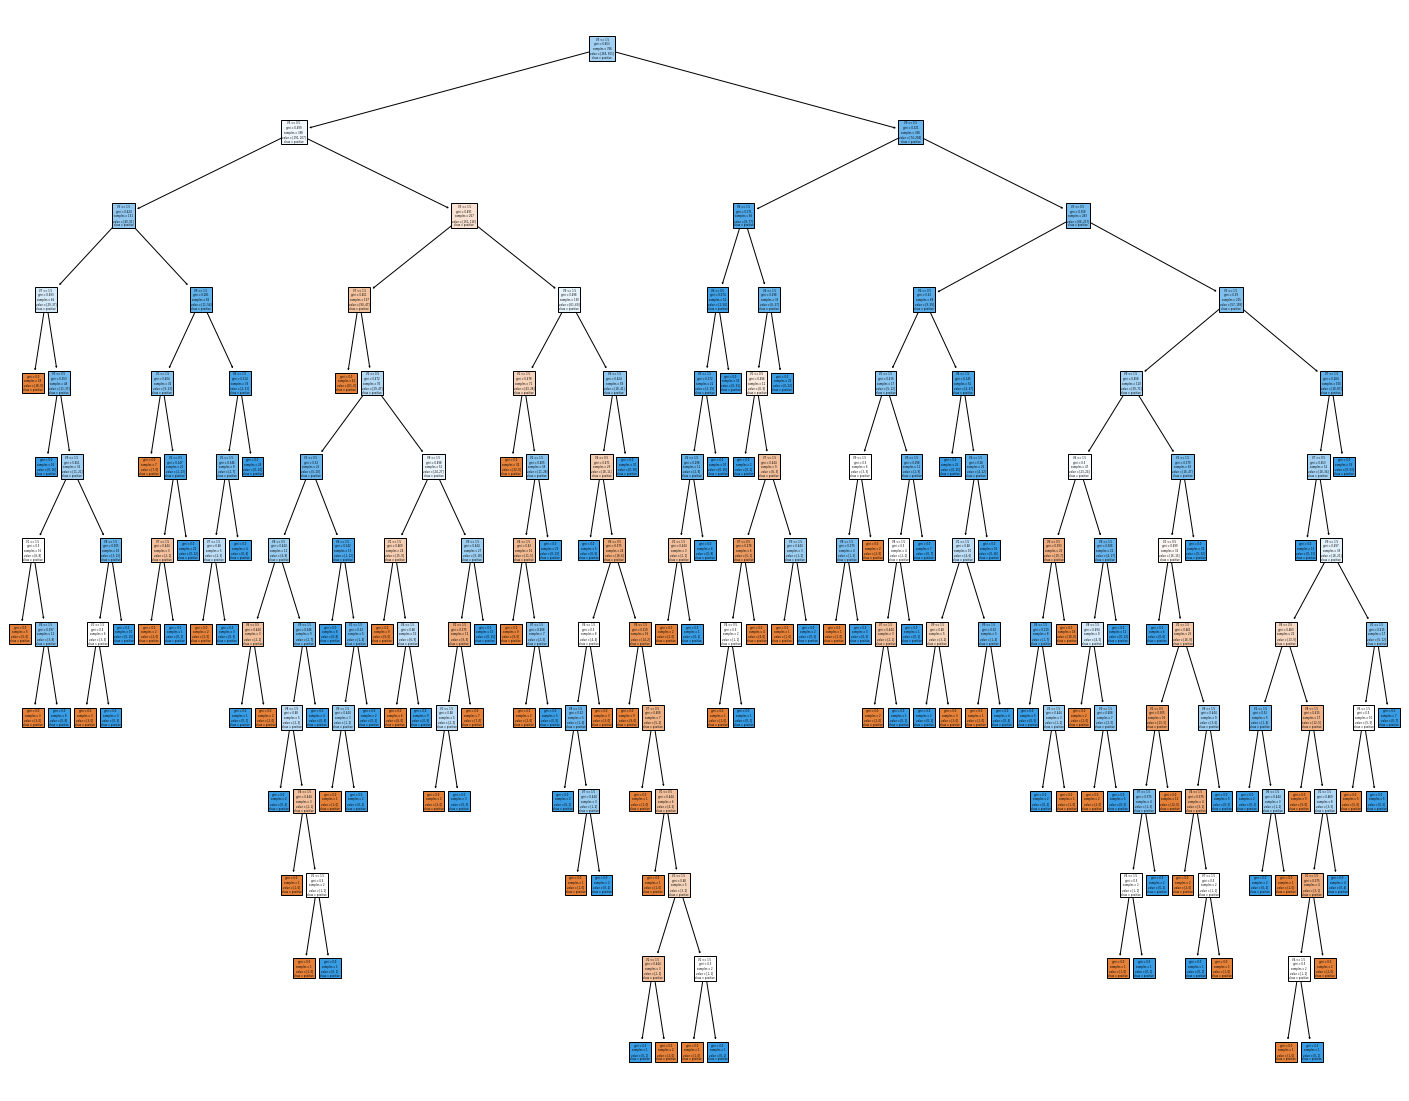

In [102]:
fig = plt.figure(figsize=(25,20)) # membuat kanvas dengan ukuran 25x20
_ = tree.plot_tree(model, 
                   feature_names=lst_encode,  
                   class_names=tictactoe['V10'],
                   filled=True) # melakukan visualisasi Decision Tree

## Membuat Confussion matrix

C:\Users\herar\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


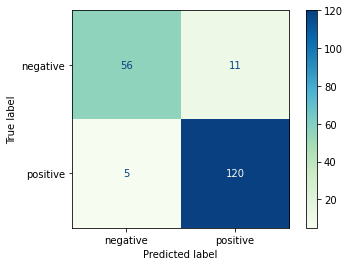

In [103]:
from sklearn.metrics import plot_confusion_matrix # untuk membuat visualisasi confusion matrix

plot_confusion_matrix(model, X_test, y_test, cmap = plt.cm.GnBu) # membuat confusion matrix

In [104]:
print(classification_report(y_test, Y_pred)) # membuat classification report

              precision    recall  f1-score   support

    negative       0.92      0.84      0.88        67
    positive       0.92      0.96      0.94       125

    accuracy                           0.92       192
   macro avg       0.92      0.90      0.91       192
weighted avg       0.92      0.92      0.92       192



In [105]:
pickle.dump(model, open('tictactoe.pkl', 'wb'))